In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
import random
%matplotlib inline

In [85]:
# Method 1: Generate Arrival Times

def poisson_p():
    arrival_time = np.array([])
    # simulate between 0-20 as time interval
    t = 0
    T = 20
    # lambda can be changed as time passes, expressed as function instead of a constant
    # to find the function of lambda, look at hospitalizations and fit a curve to the data
    # the equation of that curve is going to be the value of lambda as time passes
    # this affects the arrivals + as lambda increases the number of events increases
    # for now we assume it is constant
    lmbda = 1
    # this is a formula that allows the simulation of an exponential distribution:
    # explain later...
    delta_t = 1/lmbda - np.log(np.random.rand())
    t = t + delta_t
    while (t<T):
        # add the new arrival time to the numpy array
        arrival_time = np.append(arrival_time, t)
        # this equation always returns a positive value, and it resets t
        # np.log(np.random.rand()) is always negative, that's why there is a minus and not a plus sign
        t = t - 1/lmbda*np.log(np.random.rand())
    return arrival_time

1

In [75]:
# usually generates around 20 events
# this is because lambda*T (1*20) is the expected value of the poisson dist because that is the parameter!
# over many iterations the average length will be zero
# if we take the average over many many iterations, the average number of events drifts towards the parameter value 20
poisson_p()

array([ 2.50934145,  2.79341957,  3.43125158,  3.48207086,  6.77964694,
        6.80463114,  9.50722319,  9.69067208, 10.44815755, 10.78221908,
       14.32433686, 15.74127091, 17.76134947, 19.85624988])

In [76]:
# next steps: look at graph of hospitalizations and fit a regression
poisson_p()

array([ 2.42718936,  2.70967559,  3.04688983,  3.08781862,  4.38413606,
        4.86553589,  5.49395744,  6.69954203,  7.25984743,  7.39237629,
        8.14469696,  9.07622482,  9.56573573, 10.52806641, 11.47921904,
       12.96370819, 13.45803943, 15.49426649, 15.95402299, 17.07337131,
       17.52984747, 17.87907969, 18.2437583 ])

In [17]:
# Fit a regression to hospitalizations
data = pd.read_csv("summer-research-2020/covid-tracking-project-ny.csv")
data

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200805,NY,418225,5808210,NaN,564.0,89995.0,134.0,NaN,69.0,...,6226435,4,0,f16995e7aabcaff873da5e93b8a73ad31635634b,0,0,0,0,0,NaN
1,20200804,NY,417589,5736178,NaN,568.0,89995.0,139.0,NaN,69.0,...,6153767,3,0,84b8716ddeb6ddfb438768ef19c62856846e73f3,0,0,0,0,0,NaN
2,20200803,NY,416843,5665931,NaN,536.0,89995.0,136.0,NaN,62.0,...,6082774,2,0,d34a46fc8547c1b30fcb63dc21256c4256878091,0,0,0,0,0,NaN
3,20200802,NY,416298,5614637,NaN,556.0,89995.0,143.0,NaN,71.0,...,6030935,6,0,cef9e33c1f6c3908cf41497cae4b3b0f4bfe4647,0,0,0,0,0,NaN
4,20200801,NY,415767,5556207,NaN,581.0,89995.0,147.0,NaN,72.0,...,5971974,14,0,13d69d7c8754f16ba59c0271c7c397a7a4f9e6b3,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,20200308,NY,105,92,NaN,NaN,NaN,NaN,NaN,NaN,...,197,0,0,fa2a693c8e7c1123ce6741af19746db86f9d8fce,0,0,0,0,0,NaN
151,20200307,NY,76,92,236.0,NaN,NaN,NaN,NaN,NaN,...,168,0,0,0fc0bcee0b931ade7d5379ba6ea1bbcbac513630,0,0,0,0,0,NaN
152,20200306,NY,33,92,236.0,NaN,NaN,NaN,NaN,NaN,...,125,0,0,6f6a5ab226e7632b2d5bda9d6acc6cbe9e29cd7e,0,0,0,0,0,NaN
153,20200305,NY,22,76,24.0,NaN,NaN,NaN,NaN,NaN,...,98,0,0,24af0f3d698331d8a3896c0f921342be3b0817c0,0,0,0,0,0,NaN


In [35]:
hosp = abs(data["hospitalizedCurrently"].diff().dropna())
hosp_normal = data["hospitalizedCurrently"].dropna()
infect = data["positive"].iloc[::-1].diff().dropna()
hosp

153     16.0
152     11.0
151     43.0
150     29.0
149     37.0
       ...  
4      753.0
3      531.0
2      545.0
1      746.0
0      636.0
Name: positive, Length: 154, dtype: float64

In [54]:
def generate_fit(data, degree):
    coefs = poly.polyfit(data.index, data, degree)
    curve = poly.polyval(data.index, coefs)
    return {"curve":curve,"coefs":coefs}

9151.429484516255

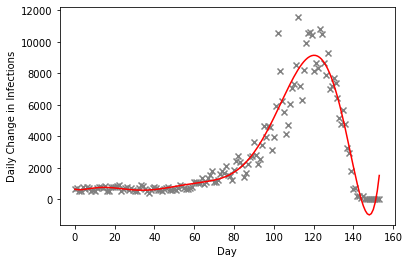

In [79]:
def plot_fit(data, degree, title):
    curve = generate_fit(data,degree)["curve"]
    plt.scatter(data.index, data, color="gray", marker="x")
    plt.plot(data.index, curve, color="red")
    plt.xlabel("Day")
    plt.ylabel(title)
# thought 8th degree fit the polynomial best?
# fit multiple curves for separate sections (non parameteric progression?)
plot_fit(infect,8,"Daily Change in Infections")

In [100]:
# thin p takes in the max lambda value (higest) and a current lambda value and returns a boolean
# X is a random number from 0 to 1 to 5 decimal places
# X < lambda(t)/lambda_max
def thin_p(highest, current):
    X = random.randint(0,10000)/10000
    ratio = current/highest
    return X < ratio

In [119]:
# VARYING LAMBDA
# the function keeps returning zeroes for some reason?
# I think it has something to do with the t value increasing by a lot for some reason check the BUG thing:
simulation = []
simulations = []

coefs = generate_fit(infect,8)["coefs"]
lmbda_max = max(generate_fit(infect,8)["curve"])
    
def poisson_p(x):
    arrival_time = np.array([])
    # simulate between 0-1 day as the time interval
    t = 0
    T = 1
    # max lambda value
    lmbda = lmbda_max
    lmbda_current = poly.polyval(x,coefs)
    # this is a formula that allows the simulation of an exponential distribution:
    delta_t = 1/lmbda - np.log(np.random.rand())
    t = t + delta_t
    while (t<T):
        # keep arrival stores whether to keep the current arrival
        keep_arrival = thin_p(lmbda,lmbda_current)
        if keep_arrival:
            # add the new arrival time to the numpy array
            arrival_time = np.append(arrival_time, t)
            # this equatooion always returns a positive value, and it resets t
            # np.log(np.random.rand()) is always negative, that's why there is a minus and not a plus sign
        t = t - 1/lmbda*np.log(np.random.rand())
    # attempt at bug checking/trying to fix the zeroes bug:
    if len(arrival_time) == 0:
        print(f"lambda current: {lmbda_current} \t lambda max: {lmbda} \t time series step: {x}")
    print(f"count:{len(arrival_time)} \t t: {t}")
    # return the number of events that occurred
    return len(arrival_time)

# x is each day, and poisson_p(x) returns the length of the runs of the poisson process
for x in range(0,len(infect)+1):
    simulation.append(poisson_p(x))
    

count:26 	 t: 1.000015087814536
count:450 	 t: 1.000142159781564
count:379 	 t: 1.0000687069357792
lambda current: 611.8480739256984 	 lambda max: 9151.429484516255 	 time series step: 3
count:0 	 t: 1.68642555288822
count:130 	 t: 1.0000659787465584
count:75 	 t: 1.0002801917396498
count:670 	 t: 1.0000982256741155
count:620 	 t: 1.0002044767532066
lambda current: 690.6975052546851 	 lambda max: 9151.429484516255 	 time series step: 8
count:0 	 t: 1.5055757343682192
lambda current: 708.1857175041102 	 lambda max: 9151.429484516255 	 time series step: 9
count:0 	 t: 1.025551370476145
count:646 	 t: 1.0001012232065782
lambda current: 736.77508441125 	 lambda max: 9151.429484516255 	 time series step: 11
count:0 	 t: 4.041740979447596
count:551 	 t: 1.0001701383100594
lambda current: 753.9459696396899 	 lambda max: 9151.429484516255 	 time series step: 13
count:0 	 t: 1.174986089094797
count:527 	 t: 1.0001610864509454
count:255 	 t: 1.0000809155394832
lambda current: 756.2091883476783 	

count:5356 	 t: 1.0000022484201516
lambda current: 6031.682199306175 	 lambda max: 9151.429484516255 	 time series step: 133
count:0 	 t: 1.3447170081829316
lambda current: 5524.745135533654 	 lambda max: 9151.429484516255 	 time series step: 134
count:0 	 t: 2.0243734181794526
lambda current: 4989.015284892707 	 lambda max: 9151.429484516255 	 time series step: 135
count:0 	 t: 2.374186068016241
count:3139 	 t: 1.0000229502922113
count:1120 	 t: 1.000181056592665
lambda current: 3259.67072830636 	 lambda max: 9151.429484516255 	 time series step: 138
count:0 	 t: 1.264462733193609
count:2344 	 t: 1.0000412784963806
count:802 	 t: 1.000065206774581
lambda current: 1495.9716609165903 	 lambda max: 9151.429484516255 	 time series step: 141
count:0 	 t: 2.814732229730853
count:413 	 t: 1.000016504529143
count:300 	 t: 1.0000486977595806
lambda current: -28.957759971099108 	 lambda max: 9151.429484516255 	 time series step: 144
count:0 	 t: 1.0001542085280593
lambda current: -420.360333457

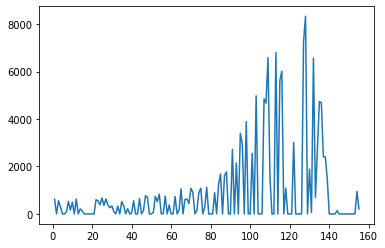

In [117]:
plt.plot(range(1,len(simulation)+1),simulation)

In [103]:
simulation

[0,
 0,
 0,
 0,
 8650,
 0,
 0,
 7844,
 0,
 7214,
 7046,
 0,
 1318,
 6162,
 0,
 7759,
 3509,
 0,
 0,
 8965,
 1446,
 6405,
 4474,
 0,
 6861,
 0,
 5134,
 0,
 0,
 0,
 0,
 6336,
 2911,
 8196,
 4863,
 0,
 0,
 5044,
 0,
 4338,
 8149,
 0,
 0,
 0,
 5689,
 0,
 5594,
 0,
 8507,
 3110,
 8350,
 3267,
 0,
 6634,
 0,
 2260,
 8596,
 8780,
 7222,
 4199,
 6978,
 1118,
 7383,
 0,
 7314,
 0,
 112,
 214,
 7263,
 0,
 486,
 0,
 4457,
 8720,
 2656,
 5788,
 3763,
 7266,
 8573,
 6739,
 0,
 280,
 1662,
 0,
 404,
 4341,
 900,
 0,
 0,
 0,
 0,
 0,
 0,
 2272,
 9063,
 1370,
 0,
 0,
 8635,
 2241,
 0,
 0,
 530,
 5594,
 0,
 5535,
 1180,
 0,
 2205,
 0,
 0,
 6229,
 0,
 956,
 8189,
 6207,
 2936,
 3449,
 6687,
 7239,
 6002,
 0,
 6606,
 5020,
 7638,
 0,
 0,
 827,
 4197,
 7931,
 9005,
 0,
 0,
 4502,
 0,
 4855,
 0,
 0,
 2128,
 2429,
 479,
 8472,
 3999,
 8882]